### Problem Statement

You are a data scientist / AI engineer at a healthcare consulting firm. You have been provided with a dataset named **`"patient_health_data.csv"`**, which includes records of various health indicators for a group of patients. The dataset comprises the following columns:

- `age:` The age of the patient.
- `bmi:` Body Mass Index of the patient.
- `blood_pressure:` The blood pressure of the patient.
- `cholesterol:` Cholesterol levels of the patient.
- `glucose:` Glucose levels of the patient.
- `insulin:` Insulin levels of the patient.
- `heart_rate:` Heart rate of the patient.
- `activity_level:` Activity level of the patient.
- `diet_quality:` Quality of diet of the patient.
- `smoking_status:` Whether the patient smokes (Yes or No).
- `alcohol_intake:` The amount of alcohol intake by the patient.
- `health_risk_score:` A composite score representing the overall health risk of a patient.

Your task is to use this dataset to build a linear regression model to predict the health risk score based on the given predictor variables. Additionally, you will use L1 (Lasso) and L2 (Ridge) regularization techniques to improve the model's performance. 

**Import Necessary Libraries**

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

### Task 1: Data Preparation and Exploration

1. Import the data from the **`"patient_health_data.csv"`** file and store it in a variable df.
2. Display the number of rows and columns in the dataset.
3. Display the first few rows of the dataset to get an overview.
4. Check for any missing values in the dataset and handle them appropriately.
5. Encode the categorical variable `'smoking_status'` by converting 'Yes' to 1 and 'No' to 0.

In [3]:
df = pd.read_csv("patient_health_data.csv")
df.head(3)

,age,bmi,blood_pressure,cholesterol,glucose,insulin,heart_rate,activity_level,diet_quality,smoking_status,alcohol_intake,health_risk_score
0,58,24.865215,122.347094,165.730375,149.289441,22.306844,75.866391,1.180237,7.675409,No,0.824123,150.547752
1,71,19.103168,136.852028,260.610781,158.584646,13.869817,69.481114,7.634622,8.933057,No,0.852910,160.320350
2,48,22.316562,137.592457,177.342582,178.760166,22.849816,69.386962,7.917398,3.501119,Yes,4.740542,187.487398


In [4]:
df.shape

(250, 12)

In [5]:
df.isnull().sum()

age                  0
bmi                  0
blood_pressure       0
cholesterol          0
glucose              0
insulin              0
heart_rate           0
activity_level       0
diet_quality         0
smoking_status       0
alcohol_intake       0
health_risk_score    0
dtype: int64

In [9]:
df_enco=pd.get_dummies(df,columns=['smoking_status'], drop_first=True)

In [10]:
df_enco.head(2)

,age,bmi,blood_pressure,cholesterol,glucose,insulin,heart_rate,activity_level,diet_quality,alcohol_intake,health_risk_score,smoking_status_Yes
0,58,24.865215,122.347094,165.730375,149.289441,22.306844,75.866391,1.180237,7.675409,0.824123,150.547752,0
1,71,19.103168,136.852028,260.610781,158.584646,13.869817,69.481114,7.634622,8.933057,0.852910,160.320350,0


### Task 2: Train Linear Regression Models

1. Select the features and the target variable for modeling.
2. Split the data into training and test sets with a test size of 25%.
3. Initialize and train a Linear Regression model, and evaluate its performance using R-squared.
4. Initialize and train a Lasso Regression model with various alpha values provided in a list: [0.01, 0.1, 1.0, 10.0], and evaluate its performance using R-squared.
5. Initialize and train a Ridge Regression model with various alpha values provided in a list: [0.01, 0.1, 1.0, 10.0], and evaluate its performance using R-squared.

In [16]:
X = df_enco.drop(['health_risk_score'], axis=1)
y = df_enco['health_risk_score']

In [20]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.25,random_state=42)


In [21]:
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.7643620906757489

In [40]:
model.coef_

array([ 0.34418045,  0.10327706,  0.29276989,  0.18342512,  0.53001696,
        0.39607504, -0.54400426, -0.68687515, -1.12172705, -1.00163997,
        0.49876073])

In [33]:
alphas=[0.1,1.0,0.01,1.0,1.5,2,2.5,3,3.5,4,5,6,7,10]
for alpha in alphas:
    lasso_model=Lasso(alpha)
    lasso_model.fit(X_train,y_train)
    a=lasso_model.score(X_test,y_test)
    print(f"{alpha}: {a}")
    

0.1: 0.7660510208699556
1.0: 0.781976368357514
0.01: 0.7645437739018345
1.0: 0.781976368357514
1.5: 0.7887390359602471
2: 0.7914532005806773
2.5: 0.7919544701128819
3: 0.7928618680246624
3.5: 0.793427618436003
4: 0.7935346693552175
5: 0.7929111451622536
6: 0.7916211756299975
7: 0.7896647681912109
10: 0.7873364302158369


In [34]:
alphas=[0.1,1.0,0.01,1.0,1.5,2,2.5,3,3.5,4,5,6,7,10]
for alpha in alphas:
    ridge_model = Ridge(alpha)
    ridge_model = model.fit(X_train,y_train)
    b = ridge_model.score(X_test,y_test)
    print(f"{alpha}: {b}")
    


0.1: 0.7643620906757489
1.0: 0.7643620906757489
0.01: 0.7643620906757489
1.0: 0.7643620906757489
1.5: 0.7643620906757489
2: 0.7643620906757489
2.5: 0.7643620906757489
3: 0.7643620906757489
3.5: 0.7643620906757489
4: 0.7643620906757489
5: 0.7643620906757489
6: 0.7643620906757489
7: 0.7643620906757489
10: 0.7643620906757489


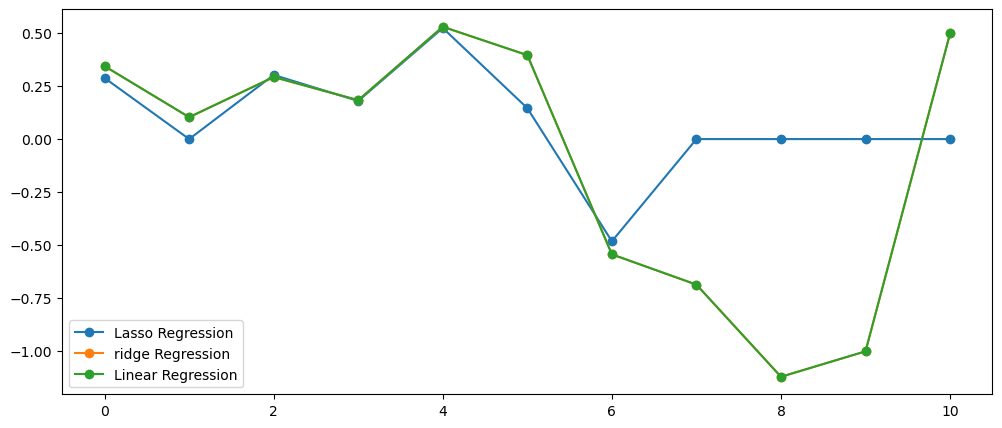

In [46]:
plt.figure(figsize=(12,5))
plt.plot(range(len(lasso_model.coef_)), lasso_model.coef_, label="Lasso Regression", marker='o')
plt.plot(range(len(ridge_model.coef_)), ridge_model.coef_, label="ridge Regression", marker='o')
plt.plot(range(len(model.coef_)), model.coef_, label="Linear Regression", marker='o')

plt.legend()
plt.show()